In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
%run MLR_Functions.ipynb

In [3]:
df_rice_y = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_crop_yield.csv")
df_fert_use = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_fertilizer_usage.csv")
df_cropland = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_cropland.csv")
df_energy = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_energy_usage.csv")
df_pop = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_urban_rural_pop.csv")
df_water = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_water_usage.csv")
df_pesticide = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_pesticide_usage.csv")
df_pesticide_imports = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_pesticide_imports.csv")
df_air_dep = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_air_deposition_nitrogen.csv")
#print(df_pesticide_imports)

In [4]:
df_INDIA = pd.DataFrame()
df_INDIA["Yield"] = df_rice_y["India Rice Yield"]
df_INDIA["Cropland"] = df_cropland["India Crop Land"]
df_INDIA["Energy"] = df_energy["India energy/cropland"]
df_INDIA["Fert"] = df_fert_use["India"]
df_INDIA["Rural Pop"] = df_pop["india rural/total"]
df_INDIA["Urban Pop"] = df_pop["india urban/total"]
df_INDIA["Water"] = df_water["wf_tot_m3_t_india"]
df_INDIA["Pesticide"] = df_pesticide["India Pesticide"]
df_INDIA["Pesticide Import"] = df_pesticide_imports["India"]
df_INDIA["Air Deposition of Nitrogen"] = df_air_dep["India Air Deposition of Nitrogen"]

df_INDIA

,Yield,Cropland,Energy,Fert,Rural Pop,Urban Pop,Water,Pesticide,Pesticide Import,Air Deposition of Nitrogen
0,2.6125,170109.0000,1.064938,70.650000,0.744253,0.255381,1398.451456,0.44,0.014590,14.0841
1,2.6271,170182.0000,1.238704,74.790000,0.741475,0.257528,1412.468478,0.42,0.010638,14.7304
2,2.6092,170006.0000,1.341016,71.500000,0.738890,0.259399,1369.645800,0.42,0.009107,15.0129
3,2.8303,170286.0000,1.494641,72.729996,0.736265,0.261260,1290.836077,0.39,0.010173,15.2793
4,2.8645,170325.0000,1.676111,79.630000,0.733634,0.263131,1357.477217,0.36,0.025008,15.8310
5,2.6972,169911.0000,1.816452,81.660000,0.731037,0.265026,1306.269599,0.36,0.029018,16.3082
6,2.8226,169525.0000,1.784211,84.570000,0.728560,0.266978,1350.249762,0.33,0.033808,16.8527
7,2.8457,170101.0000,1.931036,95.170000,0.726130,0.268951,1372.267261,0.31,0.021397,17.6312
8,2.8805,170029.0000,2.057896,98.800000,0.723710,0.270944,1226.596587,0.29,0.029740,17.3193
9,2.9782,170125.0000,1.924246,106.130005,0.721314,0.272957,1296.335443,0.27,0.031618,16.3779


In [5]:
# Extract the features and the target
df_features, df_target = get_features_targets(df_INDIA,["Energy","Fert","Rural Pop", "Urban Pop", "Water","Pesticide", "Pesticide Import", "Air Deposition of Nitrogen"],["Yield"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state = 100, test_size = 0.3)

#print(df_features_train)0
#print(df_features_test)

# Normalize the features using z normalization
array_features_train_z, means, stds = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions

X: np.ndarray = prepare_feature(array_features_train_z)
target: np.ndarray = df_target_train.to_numpy()

iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((9,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha,iterations)

# call the predict() method
pred: np.ndarray = predict_linreg(df_features_test,beta, means,stds)

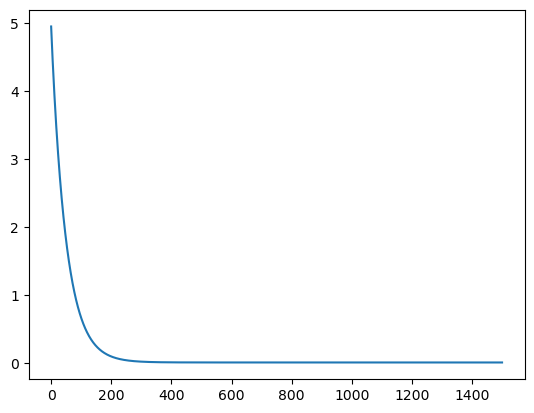

In [6]:
plt.plot(J_storage)

In [7]:
# change target test set to a numpy array
target: np.ndarray = df_target_test.to_numpy()

# Calculate r2 score by calling a function
r2: float = r2_score(target, pred)
    
# Calculate adj r2
#Set the n and k
n = 120
k = 8
adj_r2: float = adj_r_squared(n,k,target,pred)

# Calculate the mse
mse: float = np.mean((target-pred)**2)
    
# Calculate the mae
mae: float = np.mean(np.absolute(target-pred))
    
print(f"r2: {r2}")
print(f"adj_r_squared: {adj_r2}")
print(f"mse: {mse}")
print(f"mae: {mae}")

r2: 0.9332815393384363
adj_r_squared: 0.9284730016330983
mse: 0.016444014458960043
mae: 0.0936890043221194


In [8]:
print(pred)
print(df_target_test)
print(df_features_test)
print(beta)

[[2.91927408]
 [3.83481872]
 [3.95737447]
 [3.0436985 ]
 [2.83249034]
 [2.92968815]
 [3.93430367]
 [3.69289872]
 [2.81940065]]
     Yield
9   2.9782
26  3.7401
28  3.9568
13  3.1177
5   2.6972
12  2.6163
27  3.8639
25  3.6002
6   2.8226
      Energy        Fert  Rural Pop  Urban Pop        Water  Pesticide  \
9   1.924246  106.130005   0.721314   0.272957  1296.335443       0.27   
26  4.156126  153.250000   0.660956   0.328238   995.647590       0.24   
28  4.432142  162.200000   0.652498   0.336580   992.998126       0.24   
13  1.846421   98.979996   0.708280   0.283319  1235.403032       0.24   
5   1.816452   81.660000   0.731037   0.265026  1306.269599       0.36   
12  1.788779   94.670006   0.712003   0.280253  1348.851361       0.25   
27  4.354506  157.440000   0.656638   0.332274   962.668027       0.24   
25  3.680154  157.910000   0.665210   0.324348  1076.628805       0.24   
6   1.784211   84.570000   0.728560   0.266978  1350.249762       0.33   

    Pesticide Import  

In [9]:
###13  3.1177
###13  1.846421   98.979996   0.708280   0.283319  1235.403032       0.24          0.083700                     16.4799

country_yield = 3.1177
energy = 1.846421
fert_use = 98.979996
rural_pop = 0.708280
urban_pop = 0.283319
water = 1235.403032
pesticide = 0.24
pesticide_imports = 0.083700
air_dep = 16.4799 

def normalise(feature_value:int, mean, std):
    return (feature_value-mean)/std
    

def get_crop_yield(energy, fert_use, rural_pop, urban_pop, water, pesticide, pesticide_imports, air_dep, beta):
    energy_n = normalise(energy, means[0],stds[0])
    fert_use_n = normalise(fert_use ,means[1],stds[1])
    rural_pop_n = normalise(rural_pop ,means[2],stds[2]) 
    urban_pop_n = normalise(urban_pop ,means[3],stds[3])
    water_n = normalise(water ,means[4],stds[4])
    pesticide_n = normalise(pesticide, means[5], stds[5])
    pesticide_imports_n = normalise(pesticide_imports, means[6],stds[6])
    air_dep_n = normalise(air_dep, means[7],stds[7])
    y = beta[0] + beta[1]*energy_n + beta[2]*fert_use_n + beta[3]*rural_pop_n + beta[4]*urban_pop_n + beta[5]*water_n + beta[6]*pesticide_n + beta[7]*pesticide_imports_n + beta[8]*air_dep_n
    return y

print(get_crop_yield(energy, fert_use, rural_pop, urban_pop, water, pesticide, pesticide_imports, air_dep, beta))

[3.04369685]
